In [138]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Q4
### (a) Prepare the data to check the solution

In [2]:
n=10000
rng = np.random.default_rng(seed=42)
X = rng.random(size=(n, 4))
e = rng.standard_normal(size=(n))

Y=X[:,0]-2*X[:,1]+3*X[:,2]-4*X[:,3]+e

### (c) Implement the Gradient Descent (GD) algorithm

In [163]:
def gradient(w, x, y): #gradient of RSS for given weights
    return (2*x.T*(x@w-y)).sum(axis=1)/len(y)

1.0827074536108352


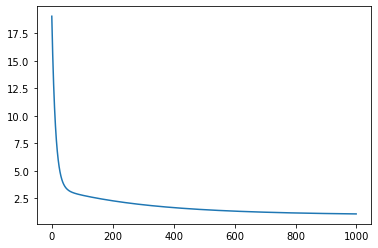

In [160]:
W = np.ones(5) #initial guess
alpha=0.01  #step size

mse = np.array([])

for i in range(1000):   
    W -= alpha*gradient(W, X_, Y) # a step
    RSS = (X_@W-Y).T@(X_@W-Y)
    mse = np.append(mse, RSS/n)

print(RSS/n)
plt.plot(mse)

1.1934658563993088


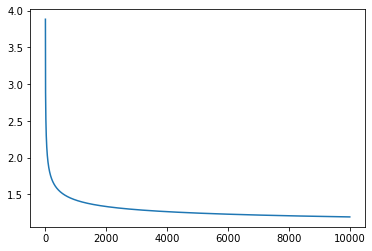

In [155]:
# Exponential decay of the step-size
W = np.ones(5) #initial guess
alpha = 0.2 #higher because of decay
mse = np.array([])
for i in range(10000): #more iterations because of decay..
    W -= alpha*gradient(W, X_, Y) # a step
    alpha= alpha*math.exp(-alpha) #exponential decay
    
    RSS = (X_@W-Y).T@(X_@W-Y)
    mse = np.append(mse, RSS/n)

print(RSS/n)
plt.plot(mse)

1.082865762922979


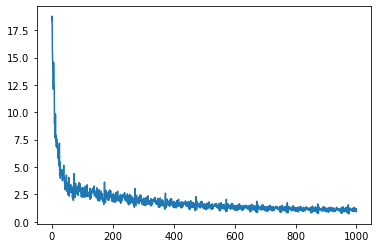

In [161]:
# batches
W = np.ones(5) #initial guess
alpha=0.01  #step size
batch = 100 #batch size
mse = np.array([])

for i in range(1000):
    ind = range((i*batch)%n,(i*batch+batch-1)%n)
    Xsam=X_[ind]
    Ysam = Y[ind]
    W -= alpha*gradient(W, Xsam, Ysam) # a step
    
    RSS = (Xsam@W-Ysam).T@(Xsam@W-Ysam)
    mse = np.append(mse, RSS/batch)

print((X_@W-Y).T@(X_@W-Y)/n)
plt.plot(mse)

1.0535832767589939


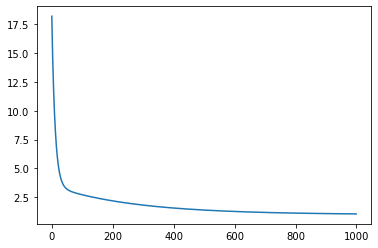

In [166]:
# Using momnet
gamma = 0.1
v=rng.random()
alpha=0.01
W = np.ones(5) #initial guess
mse = np.array([])

for i in range(1000):
    v= v*gamma + alpha*gradient(W, X_, Y)
    W -= v
    
    RSS = (X_@W-Y).T@(X_@W-Y)
    mse = np.append(mse, RSS/n)
    
print(RSS/n)
plt.plot(mse)